# Higgsin bosoni

Tässä harjoituksessa tutustutaan siihen, miten [Higgsin bosonin](https://fi.wikipedia.org/wiki/Higgsin_bosoni) olemassaolo todistettiin. Standardimallin ennusteiden mukaan Higgsin bosoni voi hajota siten, että siitä syntyy ensin kaksi Z-bosonia ja niistä edelleen neljä [leptonia](https://fi.wikipedia.org/wiki/Leptoni) (ks. kuva 1). Se ei ole ainoa prosessi jolla on samanlainen lopputila, joten meidän täytyy löytää kaikkien tapahtumien joukosta ne, joissa Higgs esiintyy. Teoria itsessään ei kerro paljoakaan siitä, mikä Higgsin hiukkasen massa voisi olla, mutta esimerkiksi neljään leptoniin hajoaminen on todennäköisempää tietyillä massoilla, joihin voimme aluksi kohdistaa etsintämme.

## KUVA HIGGSIN HAJOAMISESTA 4l TÄHÄN

Tarkoituksenamme onkin tehdä histogrammi CMS-ilmaisimen tuottamasta datasta vuosilta 2011-2012 sellaisista törmäyksistä, joissa on syntynyt 4 leptonia. 

Ennen kuin alamme tutkimaan varsinaisia mittaustuloksia, käytetään simulaatioista saatuja arvoja luodaksemme ennuste, miltä histogrammin pitäisi näyttää. Koska neljä leptonia voi syntyä useilla eri tavoilla, tulee tapaukset käsitellä erikseen. Alapuolella olevaan koodisoluun on laskettu [Monte Carlo](https://fi.wikipedia.org/wiki/Monte_Carlo_-simulaatio) -menetelmällä tuotettuja arvoja, jotka vastaavat törmäyksessä tapahtuvia tunnettuja prosesseja.

In [1]:
# Tuodaan tarvittavat moduulit.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
# Simuloidut arvot on laskettu invarianttien massojen välille 70-181 GeV.

dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])

# Simuloidut arvot huippukvarkin ja antihuippukvarkin hajoamiseen neljäksi leptoniksi.
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])

# Simuloidut arvot kahden Z-bosonin hajoamiseen neljäksi leptoniksi.
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])

# Simuloidut arvot Higgsin bosonin hajoamiseen kahdeksi Z-bosoniksi, jotka hajoavat neljäksi leptoniksi.
# Oletuksena, että Higgsin massa on 125 GeV.
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])

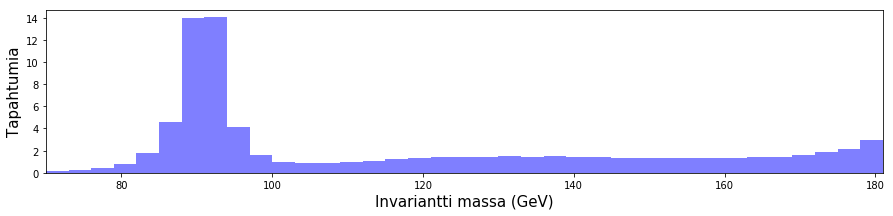

In [35]:
# Piirretään pylväsdiagrammi simuloiduista arvoista, joissa kaksi Z-bosonia hajoaa neljäksi leptoniksi.

plt.figure(figsize = (15,3))
plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black', alpha = 0.5)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()


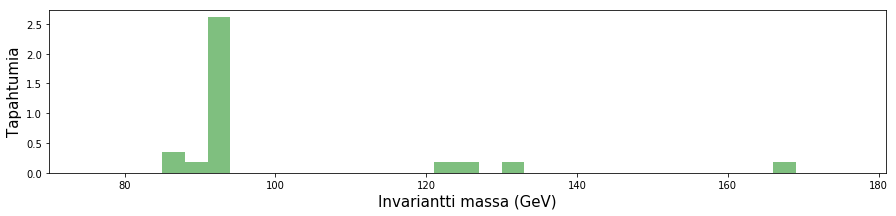

In [34]:
# Piirretään pylväsdiagrammi simuloiduista arvoista, joissa yksi Z-bosoni ja jotain muuta hajoaa neljäksi leptoniksi.

plt.figure(figsize = (15,3))
plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black', alpha = 0.5)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

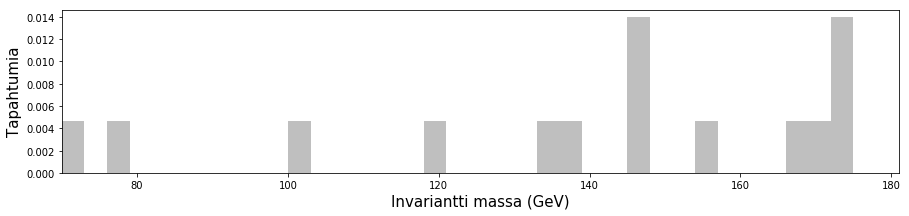

In [36]:
# Piirretään pylväsdiagrammi simuloiduista arvoista, joissa huippu- ja antihuippukvarkki hajoavat neljäksi leptoniksi.

plt.figure(figsize = (15,3))
plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b', alpha = 0.5)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

Saadaksemme ennusteelle kokonaiskuvan, piirretään äsken piirtämämme pylväsdiagrammit samaan kuvaan. Tämä ennuste ei ota Higgsin bosonia huomioon.

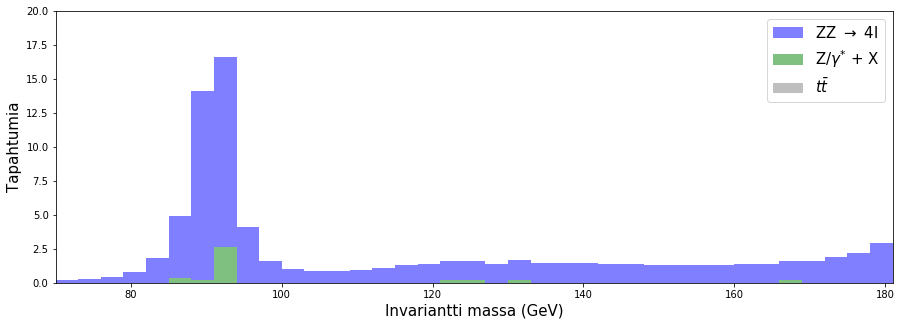

In [37]:
plt.figure(figsize = (15,5))

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.ylim(0,20)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

Saadun kuvaajan perusteella ennustamme paljon tapahtumia noin 90 GeV tuntumassa. Tutkitaan, millainen histogrammi datan avulla saadaan.

In [40]:
# Luetaan datatiedostot. 
# Data on jaettu eri tiedostoihin sen perusteella, miltä vuodelta se on sekä mitä hiukkasia on syntynyt.
# Esimerkiksi tiedosto 4mu_2011.csv sisältää vuonna 2011 mitattuja tapahtumia, joissa on syntynyt 4 myonia.

csvs = [pd.read_csv('../../../Data/4mu_2011.csv'), pd.read_csv('../../../Data/4e_2011.csv'), pd.read_csv('../../../Data/2e2mu_2011.csv')]
csvs += [pd.read_csv('../../../Data/4mu_2012.csv'), pd.read_csv('../../../Data/4e_2012.csv'), pd.read_csv('../../../Data/2e2mu_2012.csv')]

# Yhdistetään csv-tiedostot yhdeksi ketjuksi.
fourlep = pd.concat(csvs)

In [47]:
# Tutkitaan invarianttien massojen aluetta välillä 70-181 GeV. Valitaan pylväiden määräksi mielivaltaisesti 37.

rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(fourlep['M'], bins = nbins, range = (rmin,rmax))
hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

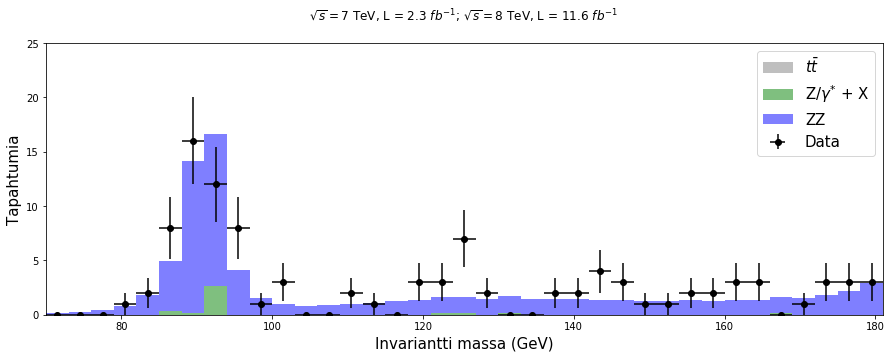

In [53]:
# Piirretään oikea data ja simulaatiot samaan kuvaan.

plt.figure(figsize = (15,5))

xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ')

# Mittaukset.
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

Vastaako data ennustetta?

#####################

Kaikki mittapisteet eivät selvästikään selity tuntemillamme taustaprosesseilla. Vertailua varten fyysikot laskivat hajontoja Higgsin bosonille lähtien eri massaisista oletuksista. Tässä näytetään, millainen hajonta tuolla hiukkasella olisi, jos sen massa olisi suunnilleen 125 GeV.

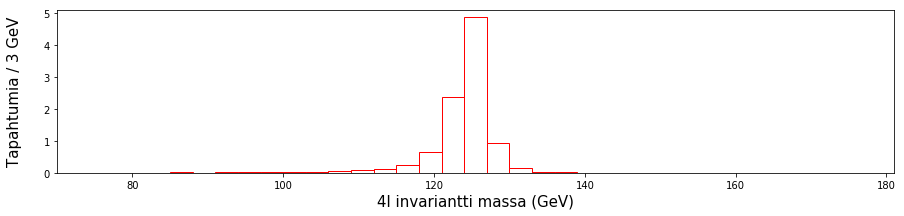

In [11]:
# HZZ, teoreettinen oletus Higgsin bosonin muodolle 125 GeVin kohdalla.

plt.figure(figsize = (15,3))
plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r')

plt.xlabel('4l invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

Bonuskysymys: miten jokin, jolla on 125 GeVin massa, voi hajota kahdeksi Z-bosoniksi, jonka massa on yli 90 GeViä?

Lisätääs tämäkin tulos kokonaiskuvaan.

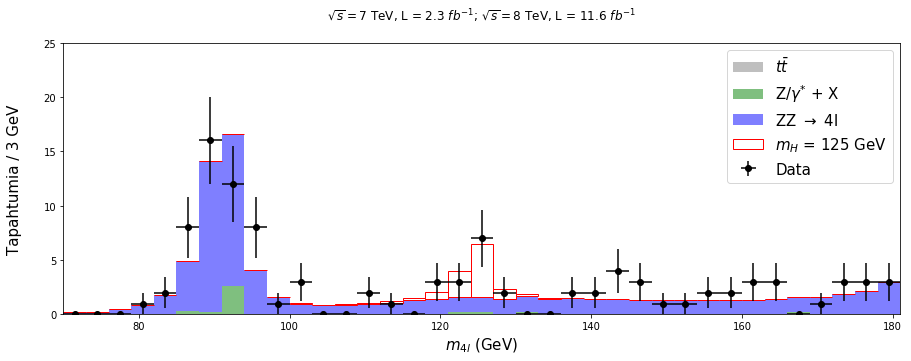

In [12]:
plt.figure(figsize = (15,5))

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# HZZ
hzz_bar = plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r',
                  bottom = ttbar+dy+zz, label = '$m_{H}$ = 125 GeV')

# Mittaukset.
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

Otos vaikuttaa hitusen pieneltä, mitä se toki puhtaasti numeromäärältään onkin, mutta se antaa silti valaisevan vilkaisun siihen, kuinka tutkimustyötä tehdään. Kovin moni hajoamisprosessi ei tuota lopputilassa neljää leptonia, joten edes näin monen pisteen saaminen käsittää suunnilleen puolet kaikesta julkisesti saatavilla olevasta datasta vuoden 2011-2012 kokeesta. Lisäinfoa mittauksista voi löytää [täältä](http://opendata.cern.ch/record/5500).

In [52]:
# Jos dataa haluaa tarkastella lähemmin, siitä löytää tietoja kaikista havainnoiduista neljästä hiukkasesta.

pd.options.display.max_columns = 50
fourlep.head(30)

,Run,Event,PID1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,PID2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,PID3,E3,px3,py3,pz3,pt3,eta3,phi3,Q3,PID4,E4,px4,py4,pz4,pt4,eta4,phi4,Q4,mZ1,mZ2,M
0,173657,34442568,13,35.9978,32.76310,-4.41922,-14.243600,33.0598,-0.418519,-0.134075,-1,-13,29.0804,-19.310500,-5.314250,21.083700,20.02840,0.918146,-2.873040,1,13,17.3154,-10.870100,-3.64596,12.975300,11.46530,0.971505,-2.817970,-1,-13,11.49390,-1.209780,11.356500,1.290290,11.42070,0.112739,1.676920,1,62.5513,20.5205,91.4517
1,166512,337493970,13,52.9826,-49.91700,8.17082,15.769600,50.5813,0.306925,2.979340,-1,13,72.1018,15.328400,21.354700,-67.139200,26.28660,-1.667150,0.948222,-1,-13,89.7552,10.346700,-20.27240,86.821400,22.76010,2.048740,-1.098880,1,-13,30.21620,2.329130,-13.068400,27.144000,13.27430,1.463510,-1.394420,1,92.1352,90.2049,235.8800
2,171091,69105221,13,165.9750,-12.62800,-30.22890,162.710000,32.7605,2.305880,-1.966510,-1,-13,68.1611,6.938370,22.857600,63.838200,23.88750,1.709440,1.276090,1,-13,19.5056,4.715170,8.50412,16.908700,9.72383,1.320370,1.064540,1,13,24.83870,-8.096830,3.056810,23.281900,8.65464,1.715610,2.780600,-1,58.3874,14.3541,79.3858
3,172952,559839432,13,110.2600,-69.15100,68.83630,-51.352400,97.5720,-0.504613,2.358470,-1,13,88.3199,85.944000,-16.819700,-11.451000,87.57430,-0.130388,-0.193263,-1,-13,45.0987,-19.982800,-29.14080,-28.024700,35.33410,-0.727298,-2.171880,1,-13,9.79377,3.020720,8.348560,-4.133240,8.87824,-0.450186,1.223630,1,91.1877,37.3758,232.9290
4,167282,44166176,-13,54.3881,-27.49990,-43.86520,-16.662800,51.7726,-0.316533,-2.130770,1,13,39.8417,31.535300,18.853300,15.408800,36.74130,0.407975,0.538835,-1,-13,20.3208,3.300810,16.01250,12.067700,16.34910,0.683619,1.367500,1,13,6.83735,4.642760,-2.386180,4.414650,5.22007,0.767963,-0.474752,-1,90.7513,14.7350,119.2900
5,172819,298086610,-13,53.1642,17.49850,37.24540,33.660100,41.1512,0.746633,1.131590,1,13,27.0532,-17.281500,-17.632800,11.058900,24.68940,0.434154,-2.346130,-1,13,16.7781,5.846700,-11.99370,10.171600,13.34290,0.702974,-1.117220,-1,-13,22.33130,-3.829540,-8.392170,20.336700,9.22464,1.531570,-1.998900,1,63.6423,13.3843,92.5968
6,166438,862270386,-13,29.9073,23.94230,10.46930,14.546300,26.1312,0.531313,0.412221,1,-13,75.9432,-11.968400,-19.757600,72.344700,23.09990,1.859330,-2.115440,1,13,88.5518,-15.822300,5.89078,-86.927300,16.88330,-2.341190,2.785180,-1,13,17.56380,-5.112180,2.263630,16.649800,5.59092,1.811470,2.724750,-1,91.9781,15.0249,211.1210
7,163817,155679852,13,87.8379,32.66190,-35.01030,-73.640800,47.8803,-1.215670,-0.820087,-1,13,27.1622,-18.696500,13.724800,14.136700,23.19330,0.576967,2.508360,-1,-13,25.1928,-14.371900,1.08510,20.662500,14.41280,1.157370,3.066230,1,-13,17.19240,-6.650080,-3.156240,-15.536400,7.36107,-1.492040,-2.698460,1,92.1075,34.8027,145.6630
8,173692,292842892,-13,47.5353,-16.36980,32.72880,-30.338900,36.5943,-0.755199,2.034580,1,13,18.1980,11.257800,-13.151300,5.609300,17.31170,0.318601,-0.862816,-1,13,11.5706,-11.176800,-1.19660,2.741490,11.24060,0.241535,-3.034940,-1,-13,11.85060,7.193540,-8.507250,4.038020,11.14090,0.354948,-0.868876,1,57.4448,19.8132,86.2909
9,172163,191231387,-13,175.2890,-2.96003,-45.12870,169.354000,45.2256,2.030840,-1.636290,1,13,147.7860,22.706000,16.746300,145.068000,28.21350,2.339870,0.635469,-1,-13,24.5629,-2.696630,24.15320,-3.560530,24.30330,-0.145985,1.681980,1,13,20.42080,-16.212200,12.408500,-0.438977,20.41580,-0.021500,2.488320,-1,91.2785,87.2163,197.5790


Huomaamme selvästi, että 125 GeVin kieppeillä tapahtuu jotain oletustemme lisäksi. Tuloksemme ovat melko samansuuntaisia kuin varsinaiset CMS:n analyysitkin, erojen noustessa pääasiassa käyttämiemme menetelmien karkeudesta.
<img src = 'https://inspirehep.net/record/1124338/files/H4l_mass_v3.png' align = 'right'>
